### Let's do some exploring and see what we are working with here.

In [1]:
#Database of tables created in SQL - see 'src' folder for details on creating 

import sqlite3 as sl
import pandas as pd

#connect to sql
conn = sl.connect('../Data/patient_data.db')
c = conn.cursor()

In [2]:
# take a look at the Patients table 

patient = pd.read_sql('''
                     SELECT DISTINCT subject_id, *
                     FROM patients;''',conn)
patient

,SUBJECT_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,249,249,F,2075-03-13 00:00:00,None,None,None,0
1,250,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
2,251,251,M,2090-03-15 00:00:00,None,None,None,0
3,252,252,M,2078-03-06 00:00:00,None,None,None,0
4,253,253,F,2089-11-26 00:00:00,None,None,None,0
...,...,...,...,...,...,...,...,...
46515,44089,44089,M,2026-05-25 00:00:00,None,None,None,0
46516,44115,44115,F,2124-07-27 00:00:00,None,None,None,0
46517,44123,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,None,1
46518,44126,44126,F,2076-07-25 00:00:00,None,None,None,0


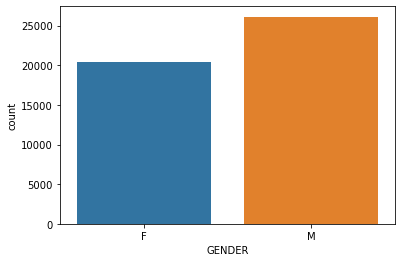

In [39]:
# do we have any imbalance in gender of patients 
#(gender is a risk factor in many conditions; anatomy, hormones, genetics all factor in)

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x=patient.GENDER)
plt.savefig('../Reports/images/Gender_Distribution.png')

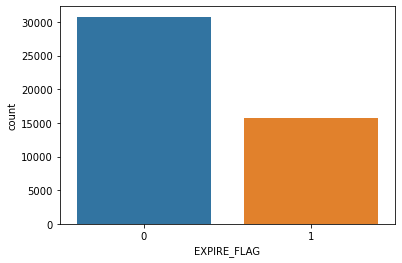

In [40]:
# how many of these patients have expired?

ax = sns.countplot(x=patient.EXPIRE_FLAG)
plt.savefig('../Reports/images/Expired_Distribution.png')

#### it looks like we have a few more male than female patients in this data set, and most were still alive when this data base was created

In [5]:
# What is in the admissions table?

admit = pd.read_sql('''SELECT * from admissions;''',conn)
admit

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,None,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,None,None,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,RENAL CANCER/SDA,0,1
58974,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


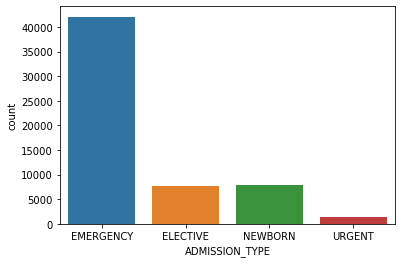

In [41]:
# let's take a look at the type of admissions = since these are ICU patients, we would expect most to have been emergency admits

ax = sns.countplot(x=admit.ADMISSION_TYPE)
plt.savefig('../Reports/images/Admit_Type_Distribution.png')

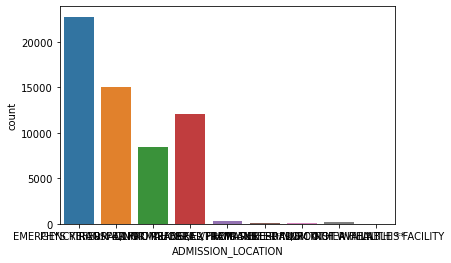

In [42]:
# Does the admit location tell us anything?

ax = sns.countplot(x=admit.ADMISSION_LOCATION)
plt.savefig('../Reports/images/Admit_Location_Distribution.png')

In [43]:
# can't really read the labels on this plot, so let's just get a count
print(admit.ADMISSION_LOCATION.unique())
admit.ADMISSION_LOCATION.value_counts()

['EMERGENCY ROOM ADMIT' 'PHYS REFERRAL/NORMAL DELI'
 'TRANSFER FROM HOSP/EXTRAM' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM SKILLED NUR' 'HMO REFERRAL/SICK'
 'TRANSFER FROM OTHER HEALT' '** INFO NOT AVAILABLE **'
 'TRSF WITHIN THIS FACILITY']


EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64

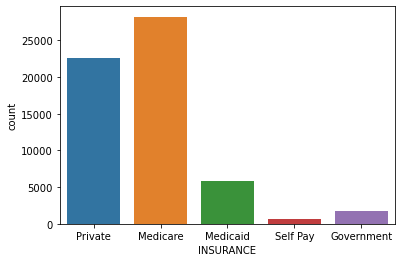

In [44]:
# let's take a look at the type of insurance a patient has - reimbursement is dependent on correctly coding for a payer

ax = sns.countplot(x=admit.INSURANCE)
plt.savefig('../Reports/images/Insurance_Distribution.png')

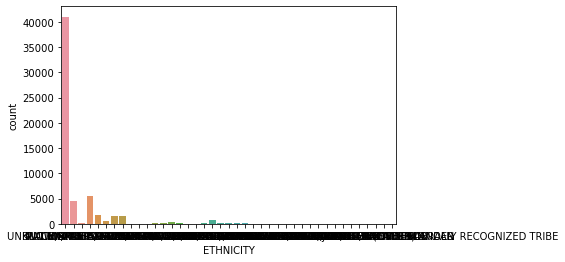

In [45]:
# like gender, we do see disparities by ethnicity 
ax = sns.countplot(x=admit.ETHNICITY)
plt.savefig('../Reports/images/Ethnicity_Distribution.png')

In [11]:
admit.ETHNICITY.unique()

array(['WHITE', 'UNKNOWN/NOT SPECIFIED', 'MULTI RACE ETHNICITY',
       'BLACK/AFRICAN AMERICAN', 'HISPANIC OR LATINO',
       'PATIENT DECLINED TO ANSWER', 'ASIAN', 'OTHER',
       'HISPANIC/LATINO - GUATEMALAN', 'ASIAN - VIETNAMESE',
       'AMERICAN INDIAN/ALASKA NATIVE', 'WHITE - RUSSIAN',
       'HISPANIC/LATINO - PUERTO RICAN', 'ASIAN - CHINESE',
       'ASIAN - ASIAN INDIAN', 'BLACK/AFRICAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - DOMINICAN',
       'UNABLE TO OBTAIN', 'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN',
       'WHITE - OTHER EUROPEAN', 'PORTUGUESE', 'SOUTH AMERICAN',
       'WHITE - EASTERN EUROPEAN', 'CARIBBEAN ISLAND', 'ASIAN - FILIPINO',
       'ASIAN - CAMBODIAN', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'WHITE - BRAZILIAN', 'ASIAN - KOREAN',
       'HISPANIC/LATINO - COLOMBIAN', 'ASIAN - JAPANESE',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'ASIAN - THAI',
       'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - CUBAN',
       'MID

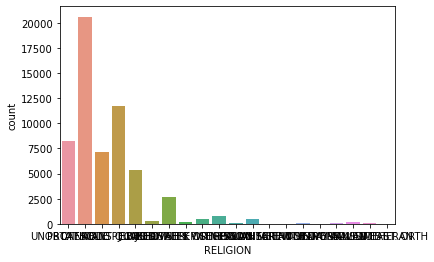

In [46]:
# since we have the data, let's ssee what the religion dist looks like
ax = sns.countplot(x=admit.RELIGION)
plt.savefig('../Reports/images/Religion_Distribution.png')

In [13]:
admit.RELIGION.unique()

array(['UNOBTAINABLE', 'CATHOLIC', 'PROTESTANT QUAKER', 'NOT SPECIFIED',
       'JEWISH', 'BUDDHIST', 'OTHER', "JEHOVAH'S WITNESS", None,
       'GREEK ORTHODOX', 'EPISCOPALIAN', 'HINDU', 'CHRISTIAN SCIENTIST',
       'HEBREW', 'METHODIST', 'UNITARIAN-UNIVERSALIST', 'BAPTIST',
       '7TH DAY ADVENTIST', 'MUSLIM', 'ROMANIAN EAST. ORTH', 'LUTHERAN'],
      dtype=object)

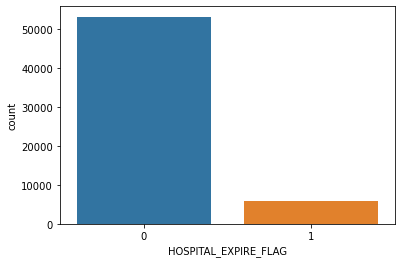

In [47]:
# we know how many people were deceased when the data was gathered, but how many of those died in the hospital?
ax = sns.countplot(x=admit.HOSPITAL_EXPIRE_FLAG)
plt.savefig('../Reports/images/Hosp_Expired_Distribution.png')

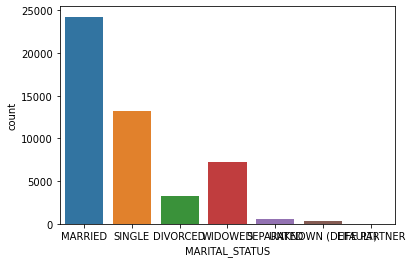

In [48]:
#marital status?  
ax = sns.countplot(admit.MARITAL_STATUS)
plt.savefig('../Reports/images/Marital_Status_Distribution.png')

In [16]:
admit.MARITAL_STATUS.unique()

array(['MARRIED', 'SINGLE', None, 'DIVORCED', 'WIDOWED', 'SEPARATED',
       'UNKNOWN (DEFAULT)', 'LIFE PARTNER'], dtype=object)

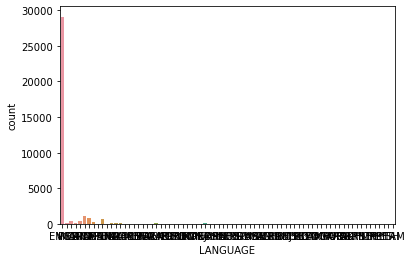

In [49]:
# what about language?
ax = sns.countplot(admit.LANGUAGE)
plt.savefig('../Reports/images/Language_Distribution.png')

In [18]:
admit.LANGUAGE.unique()

array([None, 'ENGL', 'VIET', 'PORT', 'MAND', 'CANT', 'SPAN', 'RUSS',
       'CAPE', '*MAN', 'PTUN', 'HIND', 'ITAL', 'HAIT', 'GREE', 'CAMB',
       '*ARM', '*CHI', 'ALBA', '*DEA', 'POLI', 'FREN', 'ARAB', 'AMER',
       'LAOT', '*PUN', '*URD', '*BUR', '*BEN', '*TOY', '*HUN', 'KORE',
       'THAI', 'PERS', 'ETHI', 'JAPA', '*PHI', '*IBO', '*LEB', '*FUL',
       'URDU', '*SPA', '*RUS', 'SOMA', '* BE', '*CAN', '*CDI', 'TURK',
       '*TOI', 'GERM', '*GUJ', '*BOS', '*BUL', '*TEL', '*YID', '*ROM',
       '**TO', 'BENG', '*AMH', 'TAGA', '* FU', '*MOR', '*ARA', '*YOR',
       '*FAR', '*DUT', 'SERB', '*KHM', '** T', '*NEP', '*CRE', '*FIL',
       '*LIT', '*PER', '**SH', '*TAM'], dtype=object)

#### This patient population looks like we would expect from a major Boston hospital.  Patients are mostly white, english-speaking, and married. We also see that most of the patients are admitted from the Emergency Department - this is expected with a population of ICU patients.  The majority of patients are insured, with Medicare being the most common payer.

In [19]:
# Let's look at the notes table, since our project is going to mainly be concerned with being able to extract info from notes
notes = pd.read_sql('''select * from notes;''',conn)

In [20]:
notes


,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,22532,167853.0,2151-08-04,None,None,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,13702,107527.0,2118-06-14,None,None,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,13702,167118.0,2119-05-25,None,None,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,13702,196489.0,2124-08-18,None,None,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,26880,135453.0,2162-03-25,None,None,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...
2083175,31097,115637.0,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,31097,115637.0,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,31097,115637.0,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,31097,115637.0,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


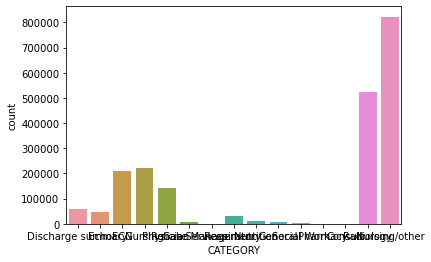

In [50]:
# What types of notes are on patient records?

ax = sns.countplot(x=notes.CATEGORY)
plt.savefig('../Reports/images/Notes_Categories.png')

In [22]:
notes.CATEGORY.unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

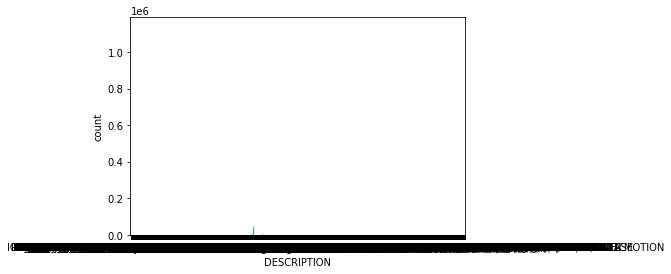

In [51]:
# Category?
ax = sns.countplot(x=notes.DESCRIPTION)
plt.savefig('../Reports/images/Notes_Description.png')

In [24]:
notes.DESCRIPTION.unique()

array(['Report', 'Addendum', 'Nursing Transfer Note', ...,
       'PLACE CATH CAROTID/INOM ART',
       'L US MSK ASPIRATE/INJ GANGLION CYST LEFT',
       'RO HIP NAILING IN OR W/FILMS & FLUORO RIGHT IN O.R.'],
      dtype=object)

In [25]:
notes.DESCRIPTION.value_counts()

Report                              1132519
Nursing Progress Note                191836
CHEST (PORTABLE AP)                  169270
Physician Resident Progress Note      62698
CHEST (PA & LAT)                      43158
                                     ...   
Cardiology consultation                   1
Fem Line Removal                          1
Inpatient Cardiology Consult              1
PO T-SPINE PORT IN O.R.                   1
C-SPINE OBLS ONLY 2 VIEWS                 1
Name: DESCRIPTION, Length: 3848, dtype: int64

In [26]:
intake = pd.read_sql('''SELECT DISTINCT description from notes;''',conn)
intake

,DESCRIPTION
0,Report
1,Addendum
2,Nursing Transfer Note
3,Nursing Progress Note
4,Physician Resident Progress Note
...,...
3843,L LOWER EXT. VENOGRAM LEFT
3844,P ABD SUPINE & LAT DECUB PORT
3845,PLACE CATH CAROTID/INOM ART
3846,L US MSK ASPIRATE/INJ GANGLION CYST LEFT


In [27]:
progress = pd.read_sql('''select distinct description from notes where description like'%progress%';''',conn)
progress

,DESCRIPTION
0,Nursing Progress Note
1,Physician Resident Progress Note
2,Physician Attending Progress Note
3,Social Work Progress Note
4,Physical Therapy Progress Note
...,...
243,RESIDENT PROGRESS NOTE - CCU
244,Resident Progress Note- CCU
245,MICU - Resident/Attending Progress Note
246,Physician Resident/Attending Progress Note - M...


In [52]:
# the first simple models used only a subset of notes, let's expand that set and see what the distrbution looks like 

notes_data = pd.read_sql("""
                    SELECT adm.subject_id, 
                          pt.gender,
                          adm.insurance,
                          adm.language,
                          adm.religion,
                          adm.marital_status,
                          adm.ethnicity,
                          adm.hadm_id,
                          admission_type,
                          admission_location,
                          notes.chartdate,
                          notes.charttime,
                          notes.category,
                          notes.description,
                          notes.iserror,
                          notes.text,
                          adm.diagnosis
                    FROM admissions as adm
                    JOIN notes on adm.subject_id = notes.subject_id
                         AND adm.hadm_id = notes.hadm_id
                    JOIN patients pt on adm.subject_id = pt.subject_id
                    WHERE adm.diagnosis in ('GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE') 
                    ORDER BY adm.subject_id, adm.hadm_id, chartdate""",conn)
notes_data.to_csv('../Data/expanded_notes_data.csv')
notes_data

,SUBJECT_ID,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
0,46,M,Medicare,None,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-20,2133-02-20 18:56:00,Radiology,DISTINCT PROCEDURAL SERVICE,NaN,[**2133-2-20**] 6:56 PM\n MESENTERIC ...,GASTROINTESTINAL BLEED
1,46,M,Medicare,None,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-21,2133-02-21 05:07:00,Nursing/other,Report,NaN,MICU NPN 7P-7A\nPt. came from IR around 2200 p...,GASTROINTESTINAL BLEED
2,46,M,Medicare,None,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-23,2133-02-23 10:48:00,Radiology,CT PELVIS W/CONTRAST,NaN,[**2133-2-23**] 10:48 AM\n CTA ABD W&W/O C & R...,GASTROINTESTINAL BLEED
3,46,M,Medicare,None,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-24,None,Discharge summary,Report,NaN,Admission Date: [**2133-2-20**] Dischar...,GASTROINTESTINAL BLEED
4,112,M,Medicare,None,JEWISH,MARRIED,WHITE,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-13,None,ECG,Report,NaN,Sinus rhythm\nAnterolateral ST-T changes sugge...,GASTROINTESTINAL BLEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-12,None,Echo,Report,NaN,PATIENT/TEST INFORMATION:\nIndication: CAD. Re...,GASTROINTESTINAL BLEED
35993,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 09:12:00,Radiology,VENOUS DUP UPPER EXT BILATERAL,NaN,[**2183-2-14**] 9:12 AM\n VENOUS DUP UPPER EXT...,GASTROINTESTINAL BLEED
35994,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 19:07:00,Radiology,REMOVE TUNNELED CENTRAL W/O PORT,NaN,[**2183-2-14**] 7:07 PM\n TUNNEL DIALYSIS REPL...,GASTROINTESTINAL BLEED
35995,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-16,None,ECG,Report,NaN,Sinus rhythm. Left ventricular hypertrophy wit...,GASTROINTESTINAL BLEED


In [29]:
notes_data.CATEGORY.unique()

array(['Radiology', 'Nursing/other', 'Discharge summary', 'ECG', 'Echo',
       'Nursing', 'Physician ', 'General', 'Respiratory ', 'Nutrition',
       'Social Work', 'Rehab Services', 'Case Management ', 'Consult'],
      dtype=object)

In [30]:
notes_data.DIAGNOSIS.value_counts()

INTRACRANIAL HEMORRHAGE    20991
GASTROINTESTINAL BLEED     15006
Name: DIAGNOSIS, dtype: int64

In [31]:
pt_admit = pd.read_sql("""
                    SELECT DISTINCT adm.subject_id, 
                          pt.gender,
                          adm.insurance,
                          adm.language,
                          adm.religion,
                          adm.marital_status,
                          adm.ethnicity,
                          adm.hadm_id,
                          admission_type,
                          admission_location,
                          adm.diagnosis
                    FROM admissions as adm
                    JOIN patients pt on adm.subject_id = pt.subject_id 
                    WHERE adm.diagnosis in ('GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE') 
                    ORDER BY adm.subject_id, adm.hadm_id""",conn)
pt_admit.to_csv('../Data/patient_admit_data.csv')
pt_admit

,SUBJECT_ID,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS
0,46,M,Medicare,None,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,GASTROINTESTINAL BLEED
1,112,M,Medicare,None,JEWISH,MARRIED,WHITE,174105,EMERGENCY,EMERGENCY ROOM ADMIT,GASTROINTESTINAL BLEED
2,158,M,Private,None,JEWISH,MARRIED,WHITE,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,GASTROINTESTINAL BLEED
3,186,F,Medicare,GREE,GREEK ORTHODOX,MARRIED,WHITE,164405,EMERGENCY,EMERGENCY ROOM ADMIT,GASTROINTESTINAL BLEED
4,212,M,Private,None,CATHOLIC,MARRIED,WHITE,189635,EMERGENCY,EMERGENCY ROOM ADMIT,INTRACRANIAL HEMORRHAGE
...,...,...,...,...,...,...,...,...,...,...,...
1394,98948,M,Medicaid,ENGL,UNOBTAINABLE,SINGLE,UNABLE TO OBTAIN,125469,EMERGENCY,CLINIC REFERRAL/PREMATURE,INTRACRANIAL HEMORRHAGE
1395,99183,M,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,184631,EMERGENCY,CLINIC REFERRAL/PREMATURE,GASTROINTESTINAL BLEED
1396,99184,F,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,WHITE,171203,EMERGENCY,EMERGENCY ROOM ADMIT,INTRACRANIAL HEMORRHAGE
1397,99366,M,Medicaid,ARAB,UNOBTAINABLE,None,UNABLE TO OBTAIN,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,INTRACRANIAL HEMORRHAGE


In [32]:
pt_admit.DIAGNOSIS.value_counts()

INTRACRANIAL HEMORRHAGE    713
GASTROINTESTINAL BLEED     686
Name: DIAGNOSIS, dtype: int64

In [33]:
pt_admit.GENDER.value_counts()

M    780
F    619
Name: GENDER, dtype: int64

In [34]:
pt_admit.ETHNICITY.unique()

array(['WHITE', 'BLACK/AFRICAN AMERICAN', 'UNKNOWN/NOT SPECIFIED',
       'OTHER', 'ASIAN', 'WHITE - RUSSIAN', 'HISPANIC OR LATINO',
       'HISPANIC/LATINO - DOMINICAN', 'PATIENT DECLINED TO ANSWER',
       'WHITE - BRAZILIAN', 'MULTI RACE ETHNICITY', 'ASIAN - VIETNAMESE',
       'ASIAN - CHINESE', 'UNABLE TO OBTAIN',
       'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - CUBAN',
       'ASIAN - OTHER', 'BLACK/CAPE VERDEAN', 'ASIAN - JAPANESE',
       'MIDDLE EASTERN', 'ASIAN - CAMBODIAN', 'WHITE - EASTERN EUROPEAN'],
      dtype=object)

In [35]:
pt_admit.ETHNICITY.value_counts()

WHITE                             1028
UNKNOWN/NOT SPECIFIED              108
BLACK/AFRICAN AMERICAN             100
OTHER                               38
HISPANIC OR LATINO                  29
ASIAN                               27
UNABLE TO OBTAIN                    23
HISPANIC/LATINO - PUERTO RICAN       7
ASIAN - CHINESE                      6
ASIAN - VIETNAMESE                   6
PATIENT DECLINED TO ANSWER           4
MULTI RACE ETHNICITY                 4
WHITE - RUSSIAN                      4
HISPANIC/LATINO - DOMINICAN          4
WHITE - BRAZILIAN                    2
ASIAN - JAPANESE                     2
HISPANIC/LATINO - CUBAN              2
BLACK/CAPE VERDEAN                   1
WHITE - EASTERN EUROPEAN             1
ASIAN - OTHER                        1
ASIAN - CAMBODIAN                    1
MIDDLE EASTERN                       1
Name: ETHNICITY, dtype: int64